# Single-variate Linear Regression without Bias Term

## Programming Lab: 032-04 Learning Rate

이번 실습에서는 learning rate이 학습에 미치는 영향을 다각도로 살펴봅니다.  
learning rate은 deep learning에서 가장 중요한 hyper-parameter 중 하나이기 때문에, 변수가 하나밖에 없는 single-variate linear regression without bias term에서 learning rate이 learnable parameter 학습에 미치는 영향을 충분히 분석하고 넘어가셨으면 합니다.

이번 실습은 learning rate에 대한 분석을 하기 위해 다음과 같은 step들로 이루어져있습니다.

<ul>
    <li> Step.1 Learning Rate Comparison1 </li>
    Learning rate이 충분히 작을 때 learning rate의 변화가 학습에 미치는 영향을 분석합니다.
    <li> Step.2 Learning Rate Comparison2 </li>
    Learning rate이 커졌을 때 불안정한 학습이 일어남을 확인하고, learning rate의 변화가 학습에 미치는 영향을 분석합니다.
    <li> Step.3 Learning Rate Comparison for Data Samples </li>
    같은 learning rate에 대해 data sample이 바뀌면 learning rate이 바뀌는 것과 비슷한 현상이 일어나는 것을 확인합니다.
    <li> Step.4 Parameter Update with Several Learning Rates </li>
    Step.3에서 비교한 data sample들을 모두 이용하여 학습을 진행할 때, learning rate이 바뀜에 따라 학습이 어떻게 일어나는지 확인합니다.
</ul>

먼저 다음의 셀을 실행하여 학습에 필요한 libary들을 import 해주세요.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

***
**Programming**  
이전 실습(032_03)에서 만들었던 get_loss_funct와 trainer를 복사/붙여넣기 해주고 실행해줍니다.

In [74]:
##### Start Your Code(get_loss_funct Function) #####
def get_loss_funct(x, y, ax):
    th_range = np.linspace(0, 6, 100)
    loss_funct = np.power(y-th_range*x, 2)
    
    ax.plot(th_range, loss_funct)
    ax.tick_params(axis = 'both', labelsize = 20)
    ax.set_xlabel(r'$\theta$', fontsize = 20)
    ax.set_ylabel(r'$\mathcal{L}$', fontsize = 20)
##### End Your Code(get_loss_funct Function) #####



##### Start Your Code(trainer Function) #####
def trainer(iterations, lr, x, y):
    th = 0.1
    th_list = []
    loss_list = []
    
    for iteration in range(iterations):
        ##### Start Your Code(Loss Calculation) #####
        pred = th * x
        loss = (y - pred) ** 2
        ##### End Your Code(Loss Calculation) #####

        th_list.append(th)
        loss_list.append(loss)
    
        ##### Start Your Code(Gradient Descent Method) #####
        th = th + 2 * lr * x * (y - pred)
        ##### End Your Code(Gradient Descent Method) #####
        
    return th_list, loss_list
##### End Your Code(trainer Function) #####

### 보충실습: for loop + axes 
Matplotlib의 figure 안에 mxn의 axes를 그릴 때 axes에 대한 indexin이 불편하다는 문제점이 있습니다.  
이는 다음과 같이 axes.flat과 built-in function enumerate()을 이용하면 보다 쉽게 axes들을 사용할 수 있습니다.

0 AxesSubplot(0.125,0.551739;0.352273x0.328261)
1 AxesSubplot(0.547727,0.551739;0.352273x0.328261)
2 AxesSubplot(0.125,0.125;0.352273x0.328261)
3 AxesSubplot(0.547727,0.125;0.352273x0.328261)


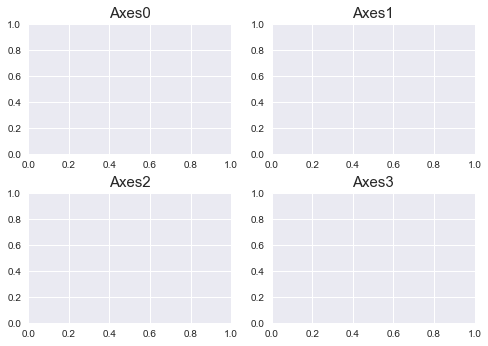

In [75]:
fig, axes = plt.subplots(2,2)
fig.subplots_adjust(hspace = 0.3) # 이 line은 신경쓰지 않아도 괜찮습니다.
for ax_idx, ax in enumerate(axes.flat):
    print(ax_idx, ax)
    ax.set_title("Axes" + str(ax_idx), fontsize = 15)

***
## Step.1 Learning Rate Comparison1

learning rate이 충분히 작을 떄는 learning rate이 커짐에 따라 target theta $\theta^{*}$에 접근하는 속도가 빨라집니다.  
이때는 적은 iteration만에 원하는 target function에 접근할 수 있기 때문에 learning rate을 키우는 것이 바람직합니다.

아래 실습에서는 하나의 data sample에 대하여 learning rate을 변화시킬 때 $\theta$이 어떻게 학습되는지 확인합니다.  
이때 효율적인 비교를 위해 2x2 axes를 가지는 figure에 차례대로 learning rate을 변화시키며 plotting 해줍니다.

***
**Programming**  
get_loss_function과 trainer를 이용하여 다음의 상황에서의 $\theta$ 변화를 확인하세요.
- $(x^{(1)},y^{(1)}) = (1,3)$
- learning rate = 0.01, 0.05, 0.1, 0.3
- iterations = 20


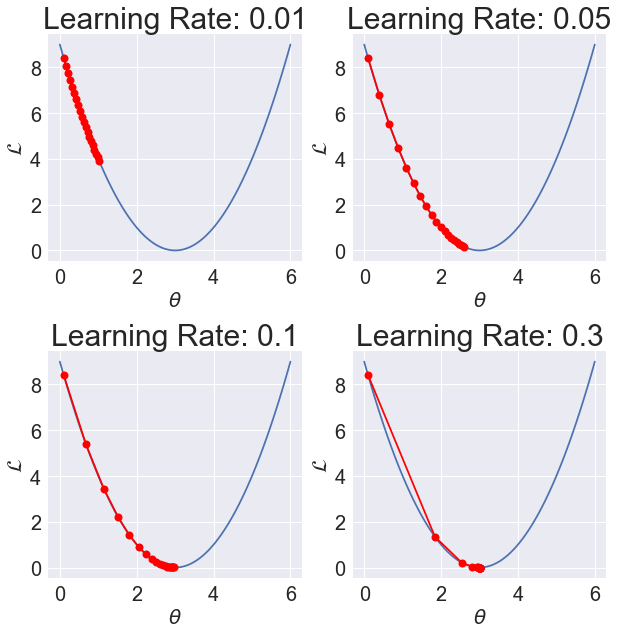

In [76]:
##### Start Your Code(Learning Preparation) #####
x1 = 1
y1 = 3
lr_list = [0.01, 0.05, 0.1, 0.3]
iterations = 20
##### Start Your Code(Learning Preparation) #####

fig, axes = plt.subplots(2, 2, figsize = (10,10))
fig.subplots_adjust(hspace = 0.4)

for ax_idx, ax in enumerate(axes.flat):
    ##### Start Your Code(Loss Funtion and Training) #####
    get_loss_funct(x1, y1, ax)
    th_list, loss_list = trainer(iterations, lr_list[ax_idx], x1, y1)
    ##### End Your Code(Loss Funtion and Training) #####
    
    ax.plot(th_list, loss_list,
            marker = 'o',
            markersize = 8,
            color = 'r')
    ax.set_title('Learning Rate: ' + str(lr_list[ax_idx]),
                fontsize = 30)

**Expected Output**  
<img src='./imgs/3_03_01.png' width = 400>

위 학습에서 사용된 코드를 compare_4_lr 함수로 만들어봅니다.  
이 함수는 lr_list와 x,y를 받아 4개의 axes에 $\theta$의 변화를 시각화해줍니다.  
또한 뒤의 학습을 위해 axes라는 parameter를 사용하여 어떤 axes에 시각화를 할지도 설정해줍니다.

***
**Programming**  
위 코드를 compare_4_lr 함수로 만드세요.  


In [77]:
def compare_4_lr(lr_list, x, y, axes):  
    ##### Start Your Code(compare_4_lr Functionalization) #####
    fig.subplots_adjust(hspace = 0.4)
    for ax_idx, ax in enumerate(axes.flat):
        ##### Start Your Code(Loss Funtion and Training) #####
        get_loss_funct(x, y, ax)
        th_list, loss_list = trainer(iterations, lr_list[ax_idx], x, y)
        ##### End Your Code(Loss Funtion and Training) #####
        
        ax.plot(th_list, loss_list,
                marker = 'o',
                markersize = 8,
                color = 'r')
        ax.set_title('Learning Rate: ' + str(lr_list[ax_idx]),
                    fontsize = 30)
    ##### End Your Code(compare_4_lr Functionalization) #####

***
**Programming**  
위에서 만든 compare_4_lr 함수를 사용하고 함수를 사용하기 전과 동일한 결과가 나오는지 확인하세요.

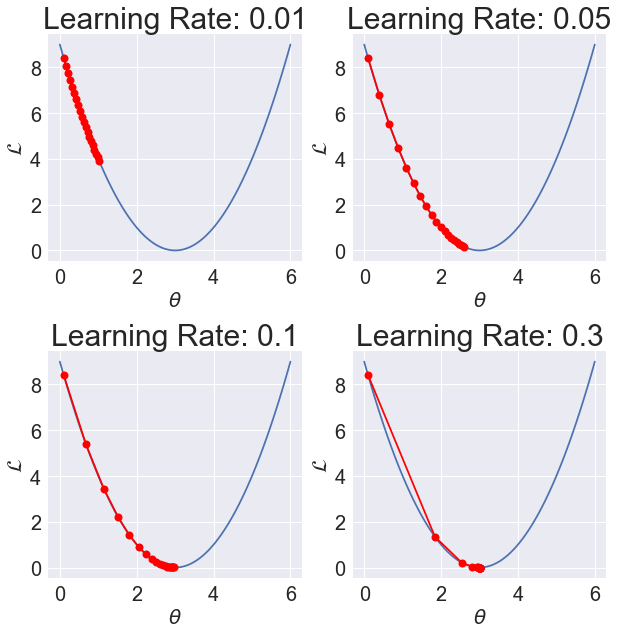

In [78]:
##### Start Your Code(Learning Preparation) #####
x1 = 1
y1 = 3
lr_list = [0.01, 0.05, 0.1, 0.3]
##### End Your Code(Learning Preparation) #####

fig, axes = plt.subplots(2, 2, figsize = (10,10))

##### Start Your Code(compare_4_lr Function) #####
compare_4_lr(lr_list, x1, y1, axes)
##### End Your Code(compare_4_lr Function) #####

**Expected Output**  
<img src='./imgs/3_03_02.png' width = 400>

***
## Step.2 Learning Rate Comparison2

이번에는 learning rate이 커짐에 따라 발생하는 문제점을 살펴봅니다.  

Step.1에서는 충분히 작은 learning rate들인 0.01, 0.05, 0.1, 0.3을 사용하였지만,  
Step.2에서는 learning rate이 0.6, 0.7, 0.8, 0.9일 때 학습이 어떻게 일어나는지 확인해봅니다.

***
**Programming**  
위의 코드에서 lr_list의 원소들을 0.6, 0.7, 0.8, 0.9로 바꾼 뒤 결과를 확인하세요.  
그리고 learning rate이 지나치게 커지는 것이 학습에 어떤 부정적인 영향을 미치는지 분석하세요.

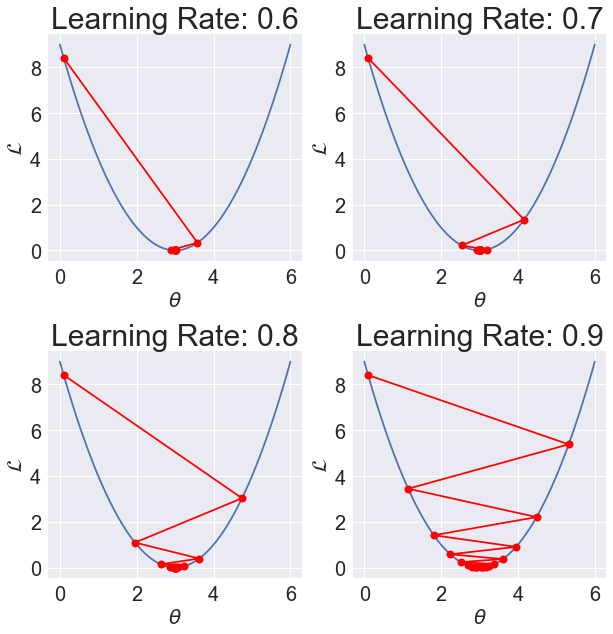

In [79]:
##### Start Your Code(Learning Preparation) #####
x1 = 1
y1 = 3
lr_list = [0.6, 0.7, 0.8, 0.9]
##### End Your Code(Learning Preparation) #####

fig, axes = plt.subplots(2, 2, figsize = (10,10))
##### Start Your Code(compare_4_lr Function) #####
compare_4_lr(lr_list, x1, y1, axes)
##### End Your Code(compare_4_lr Function) #####

**Expected Output**  
<img src='./imgs/3_03_03.png' width = 400>

***
## Step.3 Learning Rate Comparison for Data Samples

Step.3에서는 Step.1에서 사용된 lr_list를 이용하되, data sample을 바꿔봅니다.  
이를 통해 같은 learning rate에 대해서도 data sample에 따라 학습이 일어나는 모습이 다름을 확인합니다.

***
**Programming**  
위와 코드는 동일하지만, 다음의 조건에서 학습이 어떻게 진행되는지 확인하세요.  
그리고 Step.1의 결과와 비교하고 차이점이 만들어지는 원인에 대해 분석하세요.  
- $(x^{(2)},y^{(2)}) = (1.8,5.4)$
- learning rate = 0.01, 0.05, 0.1, 0.3
- iterations = 20


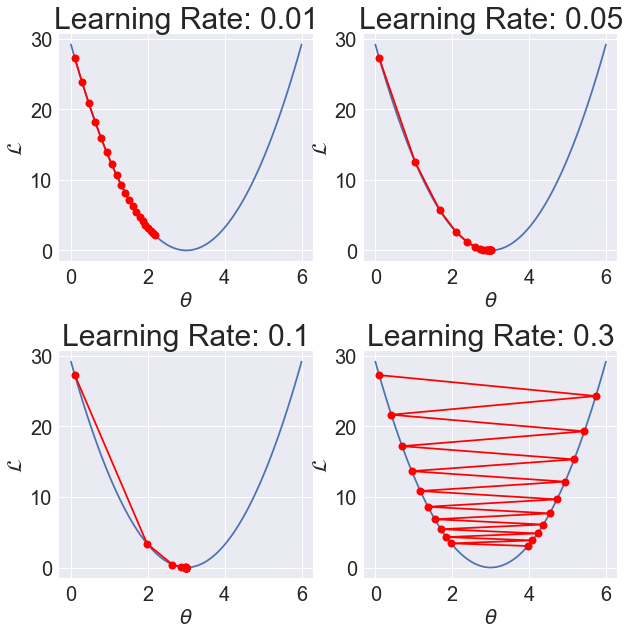

In [80]:
##### Start Your Code(Learning Preparation) #####
x1 = 1.8
y1 = 5.4
lr_list = [0.01, 0.05, 0.1, 0.3]
##### End Your Code(Learning Preparation) #####

fig, axes = plt.subplots(2, 2, figsize = (10,10))
##### Start Your Code(compare_4_lr Function) #####
compare_4_lr(lr_list, x1, y1, axes)
##### End Your Code(compare_4_lr Function) #####

**Expected Output**  
<img src='./imgs/3_03_04.png' width = 400>

위의 학습을 통해 data sample에 따라 learning rate이 증가하는 것과 비슷한 현상이 일어나는 것을 확인했습니다.

다음은 여러가지의 data sample과 learning rate에 대해서의 학습을 비교해봅니다.  
조건은 다음과 같습니다.  
- $ \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), (x^{(3)},y^{(3)})\} = \{(0.5,1.5), (1,3), (1.7,5.1)\} $
- learning rate = 0.01, 0.05, 0.1, 0.3

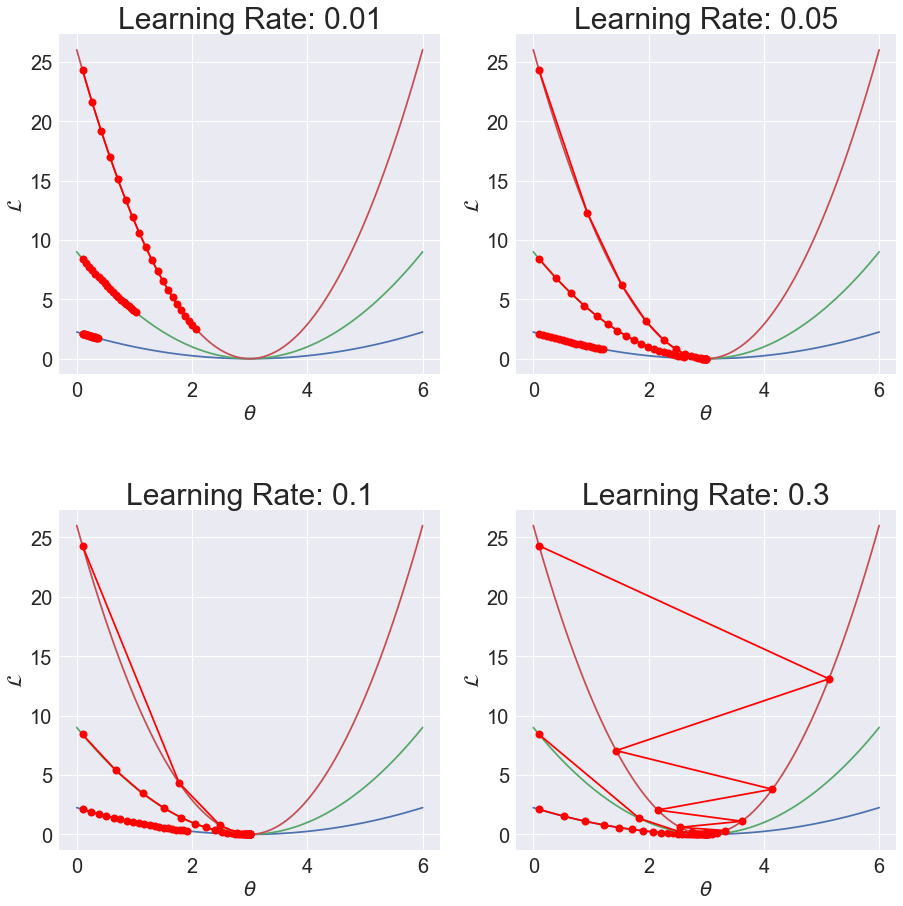

In [81]:
##### Start Your Code(Learning Preparation) #####
x_data = [0.5, 1, 1.7]
y_data = [1.5, 3, 5.1]
lr_list = [0.01, 0.05, 0.1, 0.3]
##### End Your Code(Learning Preparation) #####

fig, axes = plt.subplots(2, 2, figsize = (15,15))
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    ##### Start Your Code(compare_4_lr Function) #####
    compare_4_lr(lr_list, x, y, axes)
    ##### End Your Code(compare_4_lr Function) #####

**Expected Output**  
<img src='./imgs/3_03_05.png' width = 400>

***
## Step.4 Parameter Update with Several Learning Rates

Step.3까지는 하나의 data sample만 가지고 학습을 진행했습니다.  
Step.4에서는 여러개의 data sample들을 가지고 있는 dataset에 대해 learning rate을 바꿔가며 학습을 시켜보고,  
각 학습에서의 결과를 분석합니다.

첫 번째 학습에서의 조건은 다음과 같습니다.
- $ \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), (x^{(3)},y^{(3)})\} = \{(0.5,1.5), (1,3), (1.7,5.1)\} $
- learning rate = 0.01
- initial theta = 0.1
- epochs = 10

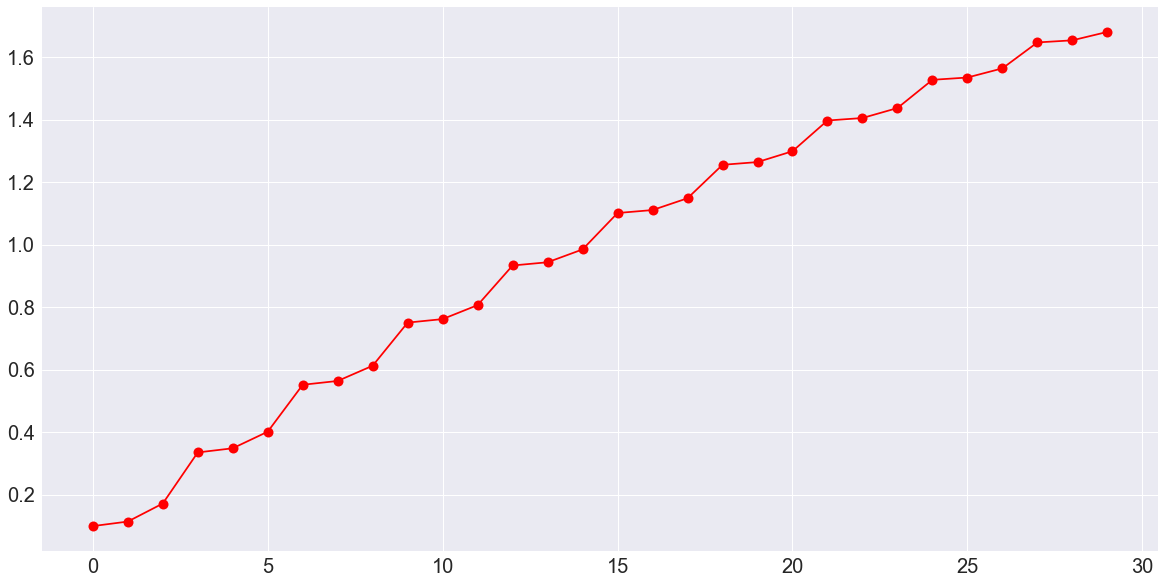

In [61]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([0.5, 1, 1.7]).reshape(-1,1)
y_data = np.array([1.5, 3, 5.1]).reshape(-1,1)
data = np.hstack([x_data, y_data])

th = 0.1
lr = 0.01
epochs = 10
##### End Your Code(Learning Preparation) #####

th_list = []
loss_list = []
    
for epoch in range(epochs):
    for x,y in data:
        ##### Start Your Code(Loss Calculation) #####
        pred = th * x
        loss = (y - pred) ** 2
        ##### End Your Code(Loss Calculation) #####
        
        th_list.append(th)
        loss_list.append(loss)
        
        ##### Start Your Code(Gradient Descent Method) #####
        th = th + 2 * lr * x * (y - pred)
        ##### End Your Code(Gradient Descent Method) #####
        
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(th_list,
        marker = 'o',
        markersize = 10,
        color = 'r')
ax.tick_params(axis = 'both', labelsize = 20)

**Expected Output**
<img src='./imgs/3_03_06.png' width = 800>

***
**Programming**  
위의 코드를 새로운 trainer 함수로 만들어봅니다.  
이 함수는 dataset을 받아 th_list, loss_list를 시각화해줍니다.

새로운 trainer 함수의 parameter는 다음과 같습니다.
- data
- lr
- th
- epochs


In [62]:
def trainer(data, lr, th, epochs):
    ##### Start Your Code(New trainer Functionalization) #####
    th_list = []
    loss_list = []

    for epoch in range(epochs):
        for x,y in data:
            ##### Start Your Code(Loss Calculation) #####
            pred = th * x
            loss = (y - pred) ** 2
            ##### End Your Code(Loss Calculation) #####

            th_list.append(th)
            loss_list.append(loss)

            ##### Start Your Code(Gradient Descent Method) #####
            th = th + 2 * lr * x * (y - pred)
            ##### End Your Code(Gradient Descent Method) #####

    fig, ax = plt.subplots(figsize = (20,10))
    ax.plot(th_list,
            marker = 'o',
            markersize = 10,
            color = 'r')
    ax.tick_params(axis = 'both', labelsize = 20)
    
    ##### Start Your Code(New trainer Functionalization) #####

***
**Programing**  
learning이 0.1일때 위의 trainer를 이용하여 학습 결과를 확인하고 learning이 0.01일때와 비교하세요.

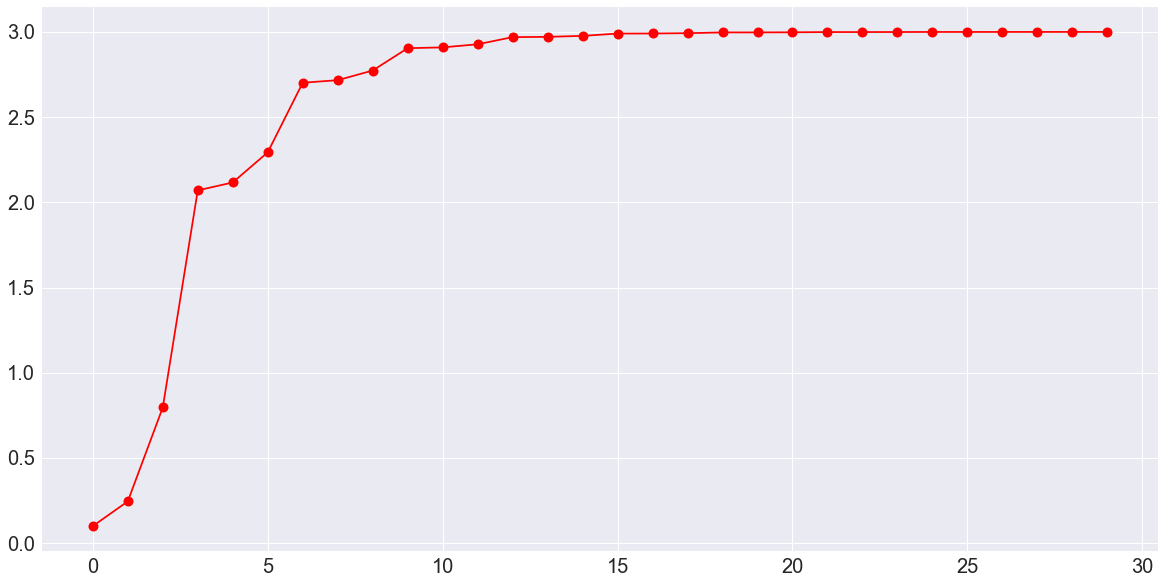

In [64]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([0.5, 1, 1.7]).reshape(-1,1)
y_data = np.array([1.5, 3, 5.1]).reshape(-1,1)
data = np.hstack([x_data, y_data])

th = 0.1
lr = 0.1
epochs = 10
##### End Your Code(Learning Preparation) #####

##### Start Your Code(trainer Function) #####
trainer(data, lr, th, epochs)
##### End Your Code(trainer Function) #####

**Expected Output**
<img src='./imgs/3_03_07.png' width = 800>


***
**Programing**  
learning이 0.6일때 위의 trainer를 이용하여 학습 결과를 확인하고 위의 결과들과 비교하세요.

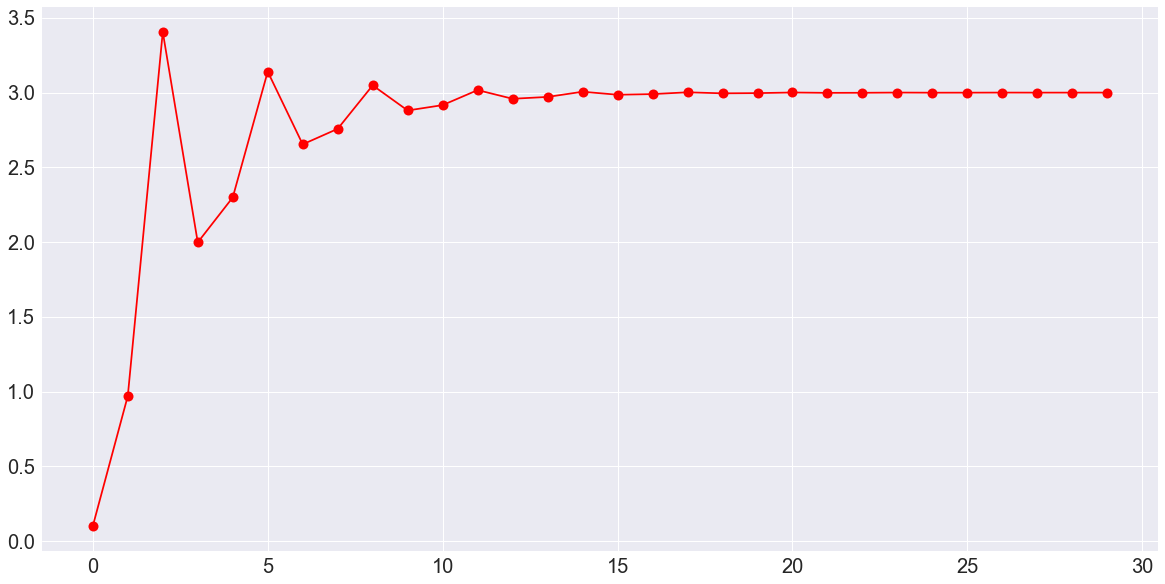

In [67]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([0.5, 1, 1.7]).reshape(-1,1)
y_data = np.array([1.5, 3, 5.1]).reshape(-1,1)
data = np.hstack([x_data, y_data])

th = 0.1
lr = 0.6
epochs = 10
##### End Your Code(Learning Preparation) #####

##### Start Your Code(trainer Function) #####
trainer(data, lr, th, epochs)
##### End Your Code(trainer Function) #####

**Expected Output**
<img src='./imgs/3_03_08.png' width = 800>

***
**Programing**  
learning이 1.0일때 위의 trainer를 이용하여 학습 결과를 확인하고 위의 결과들과 비교하세요.

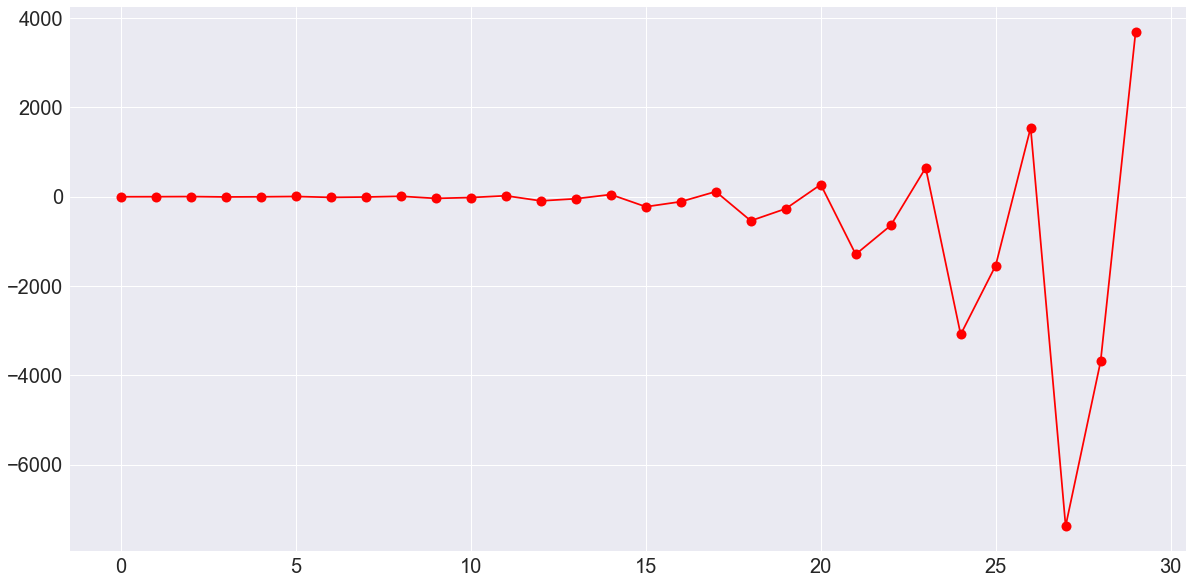

In [68]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([0.5, 1, 1.7]).reshape(-1,1)
y_data = np.array([1.5, 3, 5.1]).reshape(-1,1)
data = np.hstack([x_data, y_data])

th = 0.1
lr = 1.0
epochs = 10
##### End Your Code(Learning Preparation) #####

##### Start Your Code(trainer Function) #####
trainer(data, lr, th, epochs)
##### End Your Code(trainer Function) #####

**Expected Output**
<img src='./imgs/3_03_09.png' width = 800>